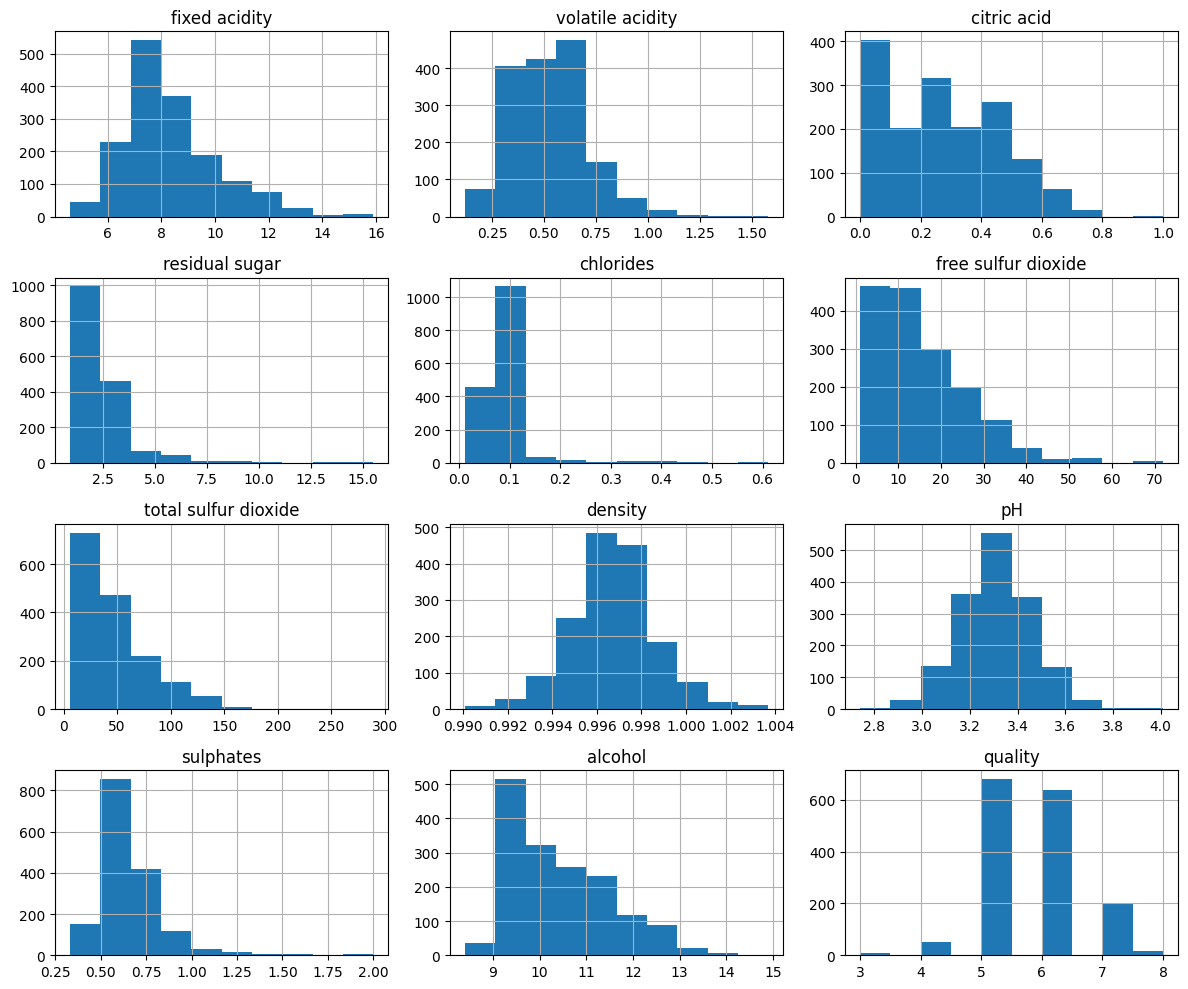

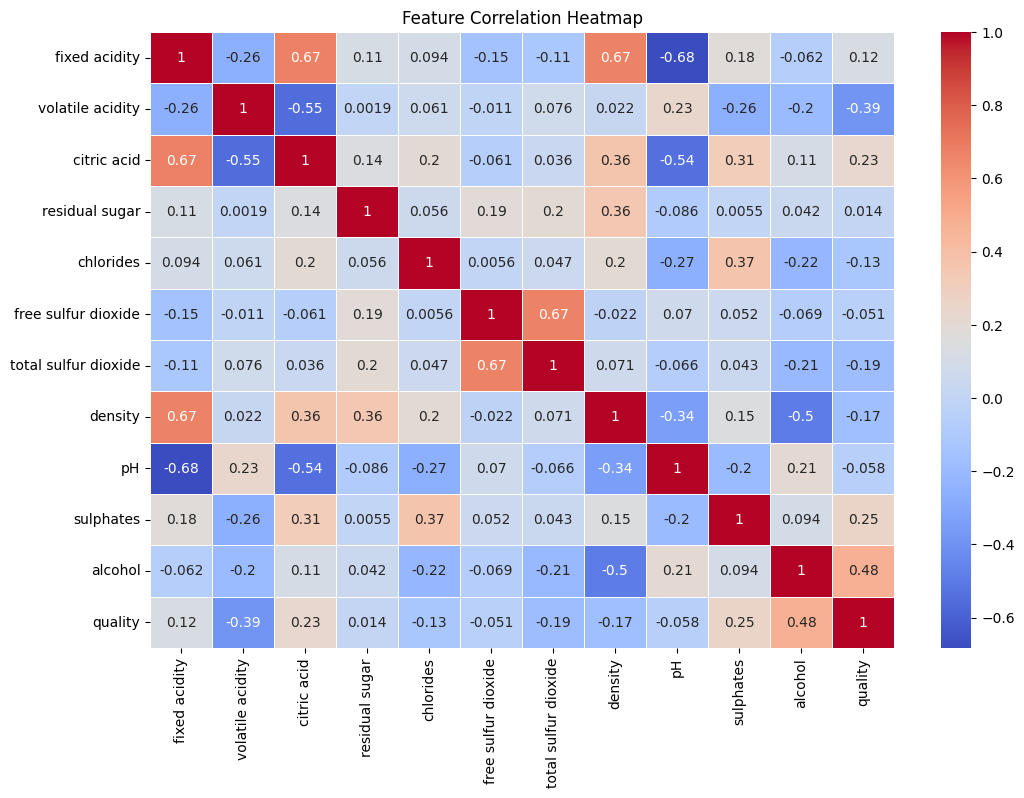

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# --- Load and Explore the Dataset ---

# Load the Wine Quality dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# --- Visualization: Before Training ---

# 1. Distribution of each feature (histograms)
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 2. Correlation heatmap between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

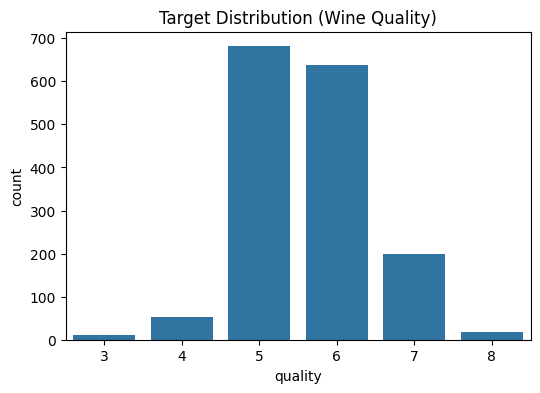

In [2]:
# 3. Distribution of the target variable (Good vs Bad wine)
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df)
plt.title('Target Distribution (Wine Quality)')
plt.show()

# --- Preprocessing and Training ---

# Separate features and target labels
X = df.drop('quality', axis=1)
y = df['quality']

# Convert the quality labels into binary classification: Good (>=7) and Bad (<7)
y = (y >= 7).astype(int)  # 1 for Good quality, 0 for Bad quality

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (standardizing helps both models perform better)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Train Random Forest Model ---
# Random Forests build an ensemble of decision trees and average their predictions

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test)

# --- Train Gradient Boosting Model ---
# Gradient Boosting is a boosting technique that builds trees sequentially to correct previous errors

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions with Gradient Boosting
y_pred_gbm = gbm.predict(X_test)


Random Forest Accuracy: 0.8875

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.62      0.49      0.55        67

    accuracy                           0.89       480
   macro avg       0.77      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480

Gradient Boosting Accuracy: 0.8625

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       413
           1       0.51      0.39      0.44        67

    accuracy                           0.86       480
   macro avg       0.71      0.66      0.68       480
weighted avg       0.85      0.86      0.85       480



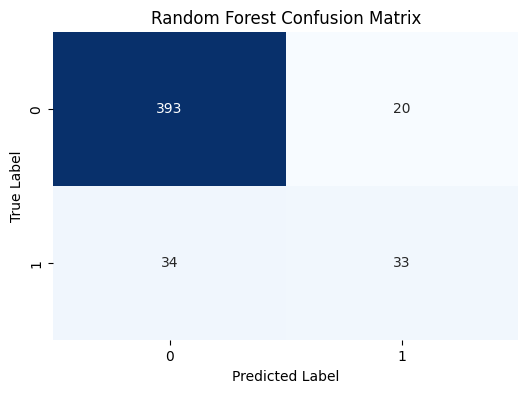

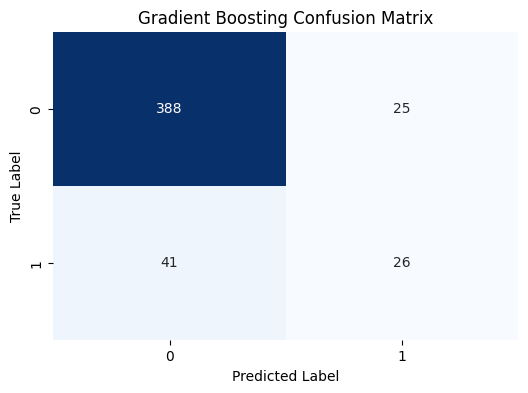

In [3]:
# --- Evaluation: After Training ---

# Evaluate Random Forest Model
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate Gradient Boosting Model
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gbm))

# --- Visualization: After Training ---

# 4. Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5. Confusion Matrix for Gradient Boosting
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

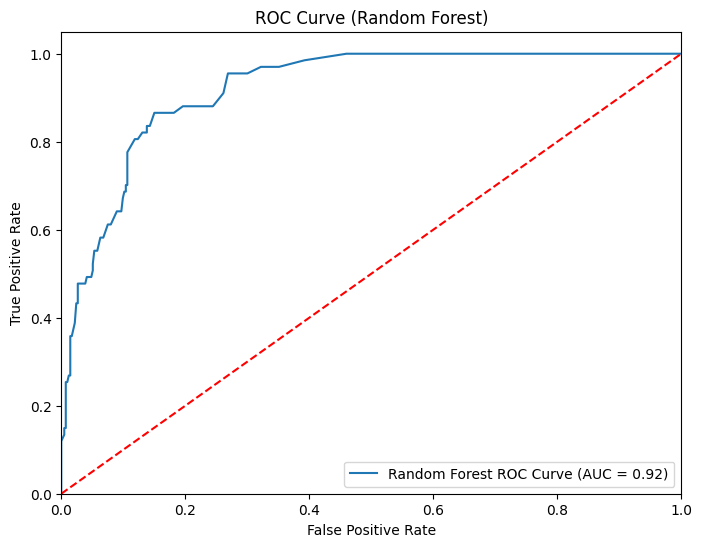

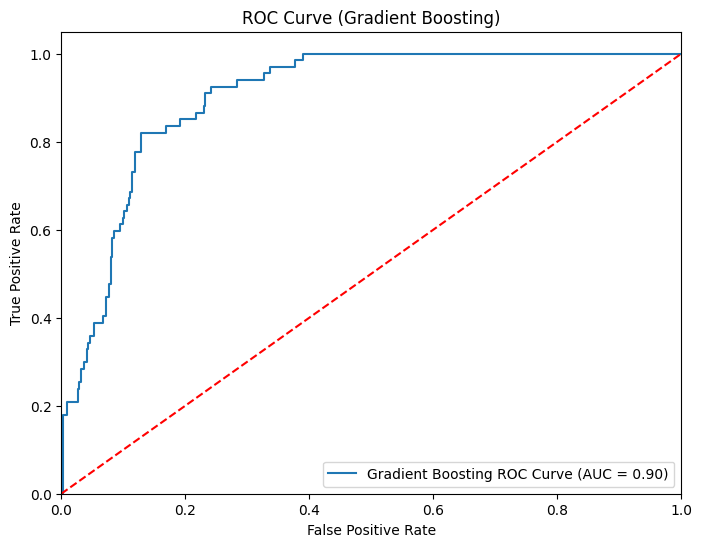

In [4]:
# 6. ROC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (chance line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# 7. ROC Curve for Gradient Boosting
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_prob_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, label=f'Gradient Boosting ROC Curve (AUC = {roc_auc_gbm:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

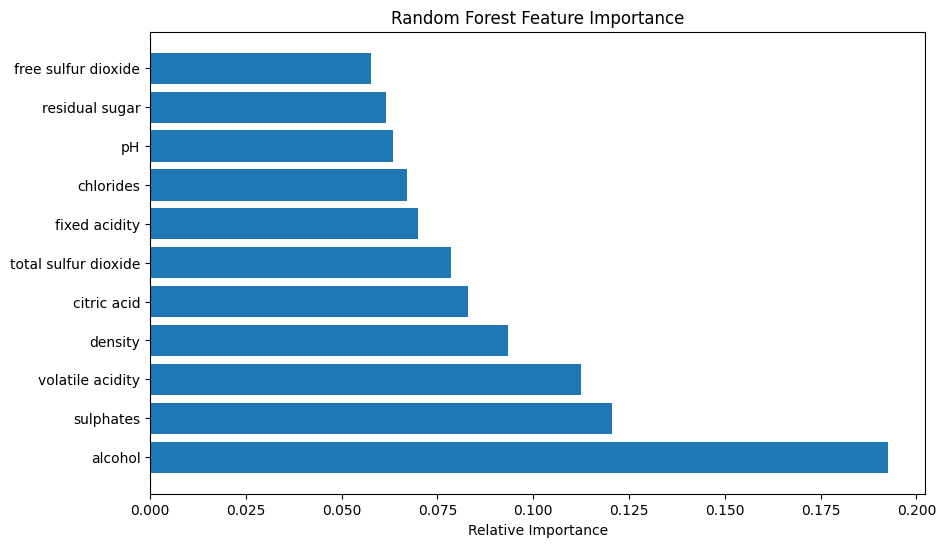

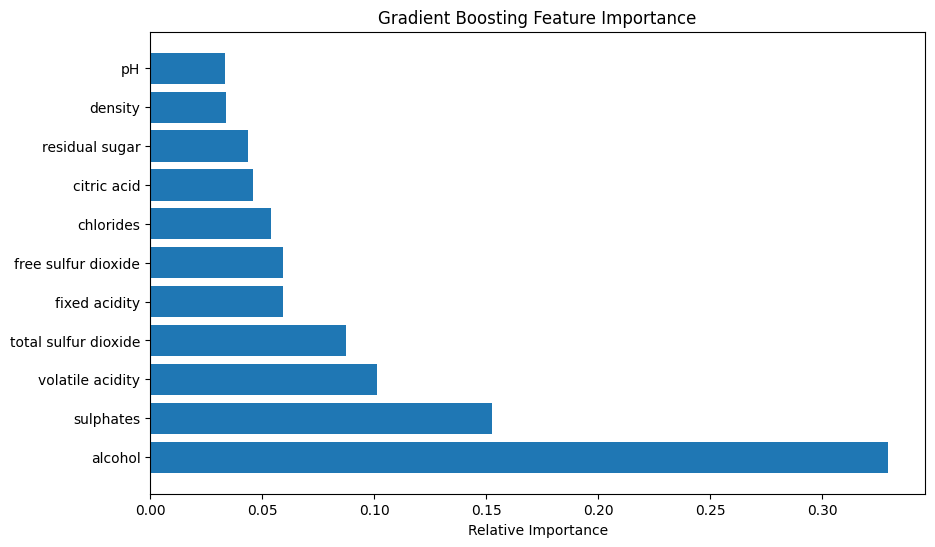

In [6]:
# --- Feature Importance ---
import numpy as np
# 8. Feature Importance for Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

# 9. Feature Importance for Gradient Boosting
importances_gbm = gbm.feature_importances_
indices_gbm = np.argsort(importances_gbm)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importance")
plt.barh(range(len(indices_gbm)), importances_gbm[indices_gbm], align='center')
plt.yticks(range(len(indices_gbm)), [features[i] for i in indices_gbm])
plt.xlabel('Relative Importance')
plt.show()